### Figure 4 (Molina, Gagne, and Prein; under review)

Fig 4. Scatter plots showing water vapor mixing ratio (1 km AGL) against bulk windshear (1-5 km AGL) for thunderstorm objects of the current and future climate evaluated as (a)hits, (b) false alarms, (c) misses, and (d) correct negatives.  The dots represent individual thun-derstorm objects of the current (black) and future (red) climates, while the stars show the meanof the respective climate thunderstorm objects.  Bivariate density distributions are also shownwith marginal plots created using Gaussian kernels.  Random subsets of thunderstorm objects areshown for easier visualization.

**Figure by Maria J. Molina (NCAR)**

Imports.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import svgutils.compose as sc
from IPython.display import SVG
from configpaths import dlproj_main, figsave_path

In [2]:
which_model = '25'

In [3]:
df_tp = pd.read_csv(f'{dlproj_main}/model{which_model}_fig4_df_tp.csv')
df_fp = pd.read_csv(f'{dlproj_main}/model{which_model}_fig4_df_fp.csv')
df_fn = pd.read_csv(f'{dlproj_main}/model{which_model}_fig4_df_fn.csv')
df_tn = pd.read_csv(f'{dlproj_main}/model{which_model}_fig4_df_tn.csv')

<Figure size 936x576 with 0 Axes>

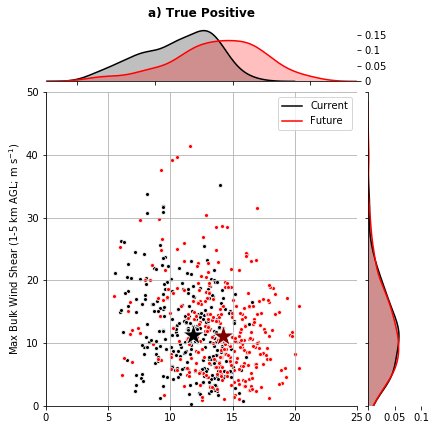

In [4]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_tp["QVAPOR_C"],y = df_tp["SHEAR_C"], data=df_tp, xlim=(3, 23), ylim=(0, 50))

sns.scatterplot(df_tp["QVAPOR_C"], df_tp["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_tp["QVAPOR_F"], df_tp["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

df_scatt = pd.DataFrame({'A': df_tp["QVAPOR_C"].median(), 
                         'B': df_tp["SHEAR_C"].median(),
                         'C': df_tp["QVAPOR_F"].median(), 
                         'D': df_tp["SHEAR_F"].median(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

sns.distplot(df_tp["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_tp["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_tp["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_tp["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

g.ax_joint.set_ylabel('Max Bulk Wind Shear (1-5 km AGL; m s$^{-1}$)', fontsize=10)
g.ax_joint.set_xlabel(' ', fontsize=10)

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_joint.grid('on')
g.ax_joint.set_title("a) True Positive", pad=75., fontweight='bold')

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.175)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"{figsave_path}/journal_fig4_tp.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

<Figure size 936x576 with 0 Axes>

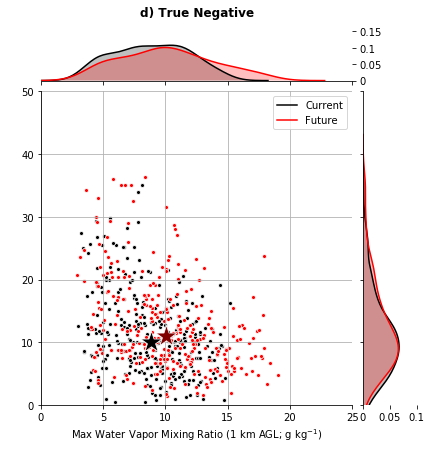

In [5]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_tn["QVAPOR_C"],y = df_tn["SHEAR_C"], data=df_tn, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df_tn["QVAPOR_C"], df_tn["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_tn["QVAPOR_F"], df_tn["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

sns.distplot(df_tn["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_tn["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_tn["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_tn["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

df_scatt = pd.DataFrame({'A': df_tn["QVAPOR_C"].median(), 
                         'B': df_tn["SHEAR_C"].median(),
                         'C': df_tn["QVAPOR_F"].median(), 
                         'D': df_tn["SHEAR_F"].median(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

g.ax_joint.set_ylabel(' ', fontsize=10)
g.ax_joint.set_xlabel(' ', fontsize=10)
g.ax_joint.grid('on')
g.ax_joint.set_title("d) True Negative", pad=75., fontweight='bold')
g.ax_joint.set_xlabel('Max Water Vapor Mixing Ratio (1 km AGL; g kg$^{-1}$)', fontsize=10)

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.165)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"{figsave_path}/journal_fig4_tn.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

<Figure size 936x576 with 0 Axes>

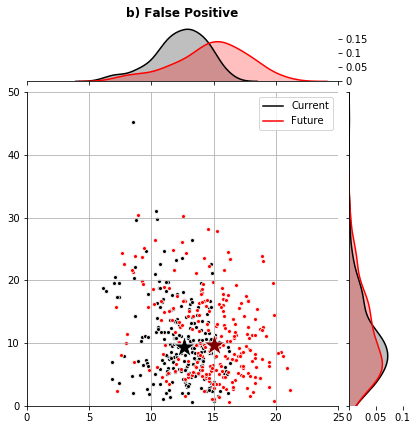

In [6]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_fp["QVAPOR_C"],y = df_fp["SHEAR_C"], data=df_fp, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df_fp["QVAPOR_C"], df_fp["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_fp["QVAPOR_F"], df_fp["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

sns.distplot(df_fp["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_fp["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_fp["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_fp["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

df_scatt = pd.DataFrame({'A': df_fp["QVAPOR_C"].median(), 
                         'B': df_fp["SHEAR_C"].median(),
                         'C': df_fp["QVAPOR_F"].median(), 
                         'D': df_fp["SHEAR_F"].median(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

g.ax_joint.set_ylabel('', fontsize=10)
g.ax_joint.set_xlabel('', fontsize=10)
g.ax_joint.grid('on')
g.ax_joint.set_title("b) False Positive", pad=75., fontweight='bold')

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.19)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"{figsave_path}/journal_fig4_fp.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

<Figure size 936x576 with 0 Axes>

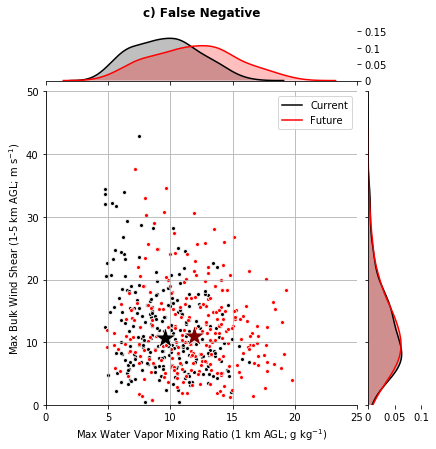

In [7]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_fn["QVAPOR_C"],y = df_fn["SHEAR_C"], data=df_fn, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df_fn["QVAPOR_C"], df_fn["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_fn["QVAPOR_F"], df_fn["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

sns.distplot(df_fn["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_fn["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_fn["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_fn["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

df_scatt = pd.DataFrame({'A': df_fn["QVAPOR_C"].median(), 
                         'B': df_fn["SHEAR_C"].median(),
                         'C': df_fn["QVAPOR_F"].median(), 
                         'D': df_fn["SHEAR_F"].median(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

g.ax_joint.set_ylabel(' ', fontsize=10)
g.ax_joint.set_xlabel('Max Water Vapor Mixing Ratio (1 km AGL; g kg$^{-1}$)', fontsize=10)
g.ax_joint.grid('on')
g.ax_joint.set_title("c) False Negative", pad=75., fontweight='bold')
g.ax_joint.set_ylabel('Max Bulk Wind Shear (1-5 km AGL; m s$^{-1}$)', fontsize=10)

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.165)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"{figsave_path}/journal_fig4_fn.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

In [8]:
sc.Figure("8in", "9in", 
    sc.Panel(sc.SVG(f"{figsave_path}/journal_fig4_tp.svg").scale(0.8).move(0,0)),
    sc.Panel(sc.SVG(f"{figsave_path}/journal_fig4_fp.svg").scale(0.8).move(340,0)),
    sc.Panel(sc.SVG(f"{figsave_path}/journal_fig4_fn.svg").scale(0.8).move(0,350)),
    sc.Panel(sc.SVG(f"{figsave_path}/journal_fig4_tn.svg").scale(0.8).move(330,350)),
    ).save(f"{figsave_path}/journal_fig4.svg")

SVG(f'{figsave_path}/journal_fig4.svg')